# Tandem Piercer Experiment - Measurement report

Load Python libraries:

In [1]:
import os
from tpe.Stats import Stats
from tpe.functions import md, load_styles, get_report_header

Load inline graphics utility (and optionally output current working directory name):

In [2]:
%pylab inline
#print("\nCurrent directory: %s" % os.getcwd())

Populating the interactive namespace from numpy and matplotlib


Initialize statistic class and output experiment statistic files to use in this report:

In [3]:
st = Stats()
st.print_experiment_stat_files("../experiments/default_2022_2_17*");

../experiments\default_2022_2_17_16_48\statistics.csv
../experiments\default_2022_2_17_17_1\statistics.csv
../experiments\default_2022_2_17_17_15\statistics.csv
../experiments\default_2022_2_17_17_27\statistics.csv


Define experiment directories to work with:

In [4]:
directory1 = "../experiments\default_2022_2_17_16_48"
directory2 = "../experiments\default_2022_2_17_17_15"
directory3 = "../experiments\default_2022_2_17_17_27"
directory4 = "../experiments\default_2022_2_17_17_1"

Output header, general settings, instrument details and trigger info for the selected measurement:

In [5]:
get_report_header(directory1)

<h2>Cd-109 1μci whole spectrum</h2><h3>General settings</h3>                <table>                <tr><th>Pulse source</th><td>Cd-109 1μci</td></tr>                <tr><th>Pulse detection</th><td>SCA `(pos[:-1] & ~pos[1:]).nonzero()`</td></tr>                <tr><th>Sample size</th><td>8e-06s</td></tr>                <tr><th>Resolution</th><td>8e-09s</td></tr>                <tr><th>PicoScope trigger</th><td>simple, alternate: True </td></tr>                <tr><th>Detector geometry</th><td>true</td></tr>                <tr><th>Front detector</th><td>na</td></tr>                <tr><th>PMT High Voltage</th><td>-1000</td></tr>                </table>
<h3>SCA instrument details</h3>
|             | Detector A   | Detector B   |
|:------------|:-------------|:-------------|
| Sca Model   | Ortec 490B   | Ortec 490B   |
| Coarse Gain | 4.0          | 4.0          |
| Fine Gain   | 3.75         | 10.0         |
| Mode        | diff         | diff         |
| Window      | 10.0         | 10.0         |
| Lower Level | 0.7          | 0.4          |
<h3>ADC limits for PicoScope channels</h3>
|                 | A (0)   | B (1)   | C (2)   | D (3)   |
|:----------------|:--------|:--------|:--------|:--------|
| Voltage range   | 10V     | 10V     | 20V     | 20V     |
| ADC low limits  | 4096    | 4096    | 842     | 576     |
| ADC high limits | 32768   | 32768   | 19661   | 19661   |
<h3>PicoScope channel map</h3>
|                        |   Detector A |   Detector B |
|:-----------------------|-------------:|-------------:|
| Sca Square Pulse Index |            0 |            1 |
| Raw Pulse Index        |            2 |            3 |
<h3>PicoScope trigger details</h3>            <table>            <tr><th>Channel (start)</th><td>0</td></tr>            <tr><th>Delay (samples)</th><td>0</td></tr>            <tr><th>Direction</th><td>RISING</td></tr>            <tr><th>Threshold (ADC)</th><td>16384</td></tr>            </table>


### Experiment measurement statistics

Read statistics from the measurement and output basic data:

In [6]:
st.read_stats_dataframe(directory1);
st.print_basic_data();



Start time:	2022-02-17 14:48:30
End time:	2022-02-17 14:58:30
Time elapsed:	0:10:00
Rows count:	38792
Total count A:	19675
Total count B:	19538
Elapsed rate A:	32.791/s
Elapsed rate B:	32.563/s
Sample rate A:	126708.0/s
Sample rate B:	125971.9/s


Total coincidences:		348
Single coincidences:		344
Coincidence elapsed rate:	4.043/s
Coincidence sample rate:	16666.67/s


## Detector clicks in time

Plot detected clicks from the detectors:

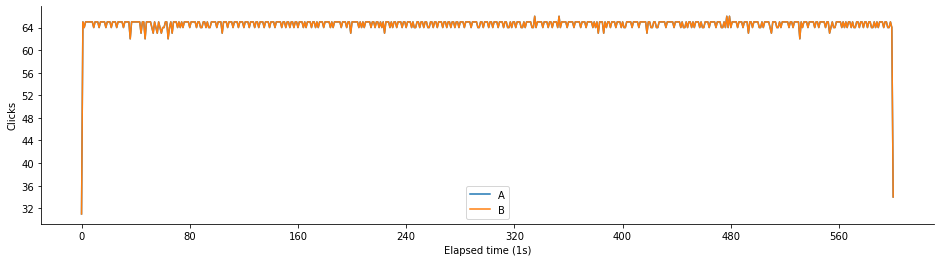

In [7]:
st.plot_channel_counts(sec=1)

## Detector accumulated clicks and sample rates

Plot accumulated clicks and rates per detector:

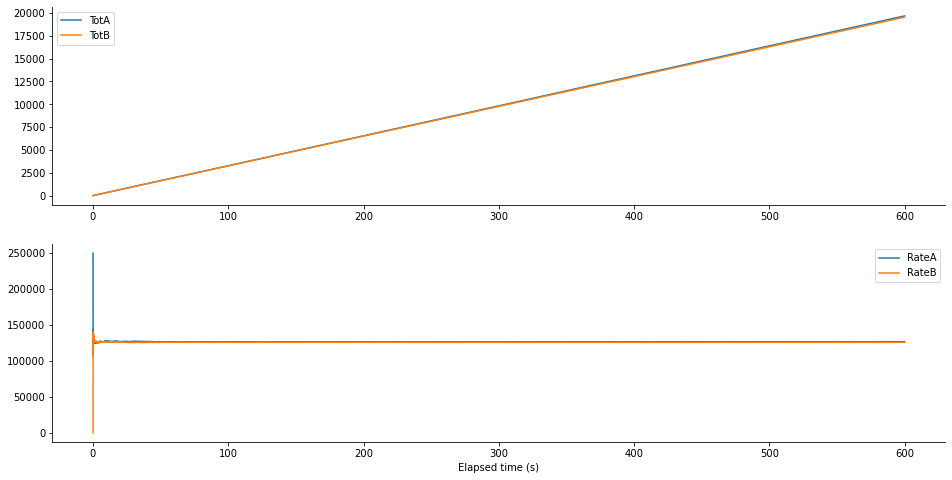

In [8]:
st.plot_channel_totals_and_rates()

## Detectors coincidence counts and rates

Plot coincident clicks, accumulated value and rates. Sample rate shows how many clicks there are in each individual sample. Elapsed rate is the value compared to running time.

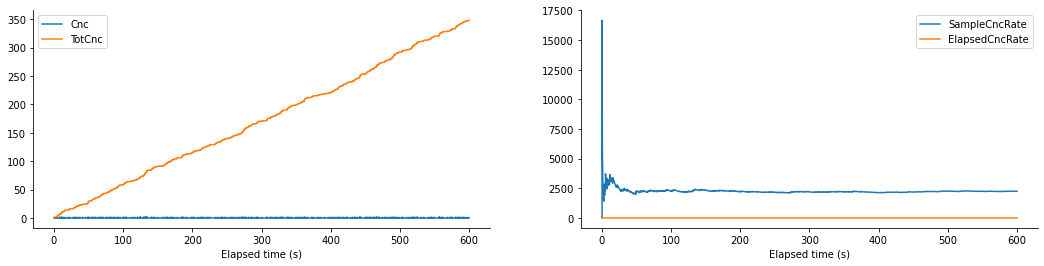

In [9]:
st.plot_coincidences_and_sample_rate()

#### Close-up view

Zoom to specific area of interest in coincidence plots:

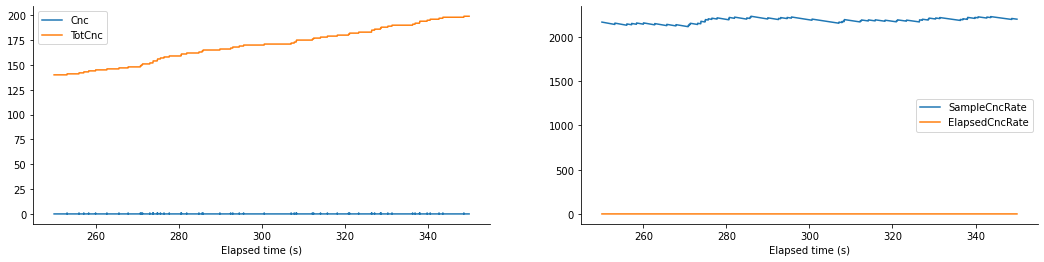

In [10]:
st.plot_coincidences_and_sample_rate(elapsed = (250, 350))

## Spectra and calibration

Determine spectrum for both channels and set calibrated values aka. ADC corresponding to kilo-electronvolts.

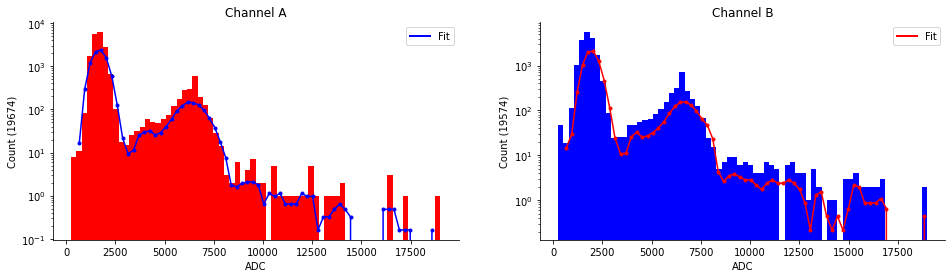

In [11]:
get_fit_spectra = lambda: st.fit_spectra(coincidences = False, log = True, bins = (70, 70), rolling = (3,2))

norm_a, norm_b, plot_a, plot_b, adc_xvalues_a, adc_xvalues_b = get_fit_spectra()

Find peaks from the spectra:

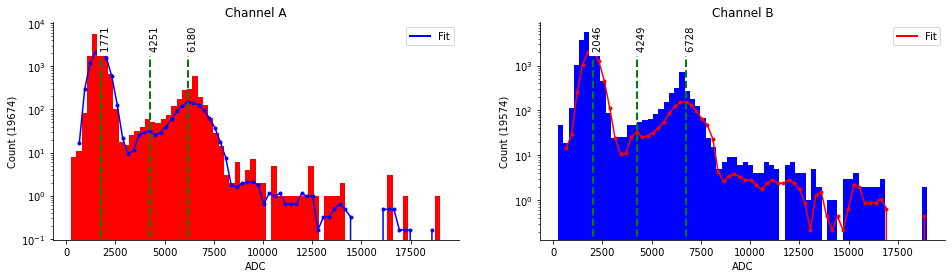

In [12]:
from tpe.Stats import plot_peak_lines, add_calibration_line

peak_a = plot_peak_lines(norm_a, width = 1, distance = 1, threshold = 0.0001)
peak_b = plot_peak_lines(norm_b, width = 1, distance = 1, threshold = 0.0001)

for a, b in zip(peak_a, peak_b):
    add_calibration_line(plot_a, int(adc_xvalues_a[a]))
    add_calibration_line(plot_b, int(adc_xvalues_b[b]))

plot_a.figure

Select peaks according to known photo peak energy values:

In [13]:
gamma_photo_peak_cd109 = 88
gamma_photo_peak_index = 2

st.adc_calibrate_a(adc_xvalues_a[peak_a[gamma_photo_peak_index]], gamma_photo_peak_cd109)
st.adc_calibrate_b(adc_xvalues_b[peak_b[gamma_photo_peak_index]], gamma_photo_peak_cd109)

Set rest of the known characteristic energy lines to confirm the spectra:

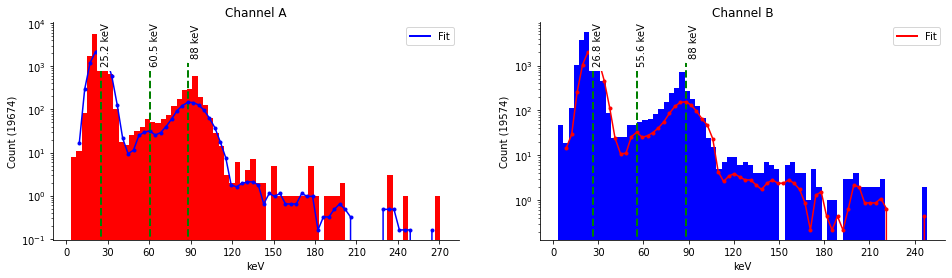

In [14]:
norm_a, norm_b, plot_a, plot_b, kev_xvalues_a, kev_xvalues_b = get_fit_spectra();

xray_peak_cd109 = 22.1
xray_peak_index = 0

add_calibration_line(plot_a, round(kev_xvalues_a[peak_a[xray_peak_index]], 1), "keV")
add_calibration_line(plot_b, round(kev_xvalues_b[peak_b[xray_peak_index]], 1), "keV")

escape_peak = 57
escape_peak_index = 1

add_calibration_line(plot_a, round(kev_xvalues_a[peak_a[escape_peak_index]], 1), "keV")
add_calibration_line(plot_b, round(kev_xvalues_b[peak_b[escape_peak_index]], 1), "keV")

### ADC to keV conversion

Output peaklines ADC to keV conversion table:

In [15]:
import pandas as pd
pd.DataFrame({
    "":    ["X-ray peak", "Escape peak", "Gamma photo peak"],
    "keV": [xray_peak_cd109, escape_peak, gamma_photo_peak_cd109],
    "ADC (A)": 
        [round(adc_xvalues_a[peak_a[xray_peak_index]], 1),
         round(adc_xvalues_a[peak_a[escape_peak_index]], 1), 
         round(adc_xvalues_a[peak_a[gamma_photo_peak_index]], 1)],
    "ADC (B)": 
        [round(adc_xvalues_b[peak_b[xray_peak_index]], 1),
         round(adc_xvalues_b[peak_b[escape_peak_index]], 1), 
         round(adc_xvalues_b[peak_b[gamma_photo_peak_index]], 1)]
}).set_index("")

,keV,ADC (A),ADC (B)
,,,
X-ray peak,22.100,1771.600,2046.300
Escape peak,57.000,4251.600,4249.700
Gamma photo peak,88.000,6180.500,6728.500


## Coincidence time histogram and scatter plot

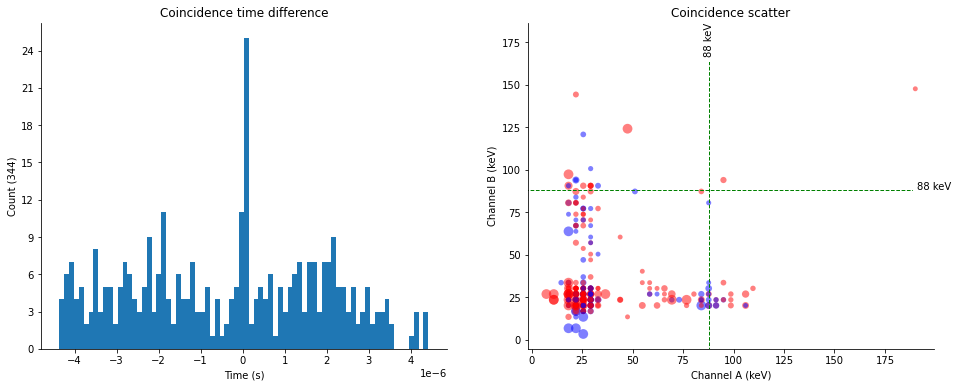

In [16]:
st.add_calibration_line(xray_peak_cd109)
st.add_calibration_line(escape_peak)
st.plot_time_histogram_and_scatter()

### Only coincidences where time difference is from zero to 100

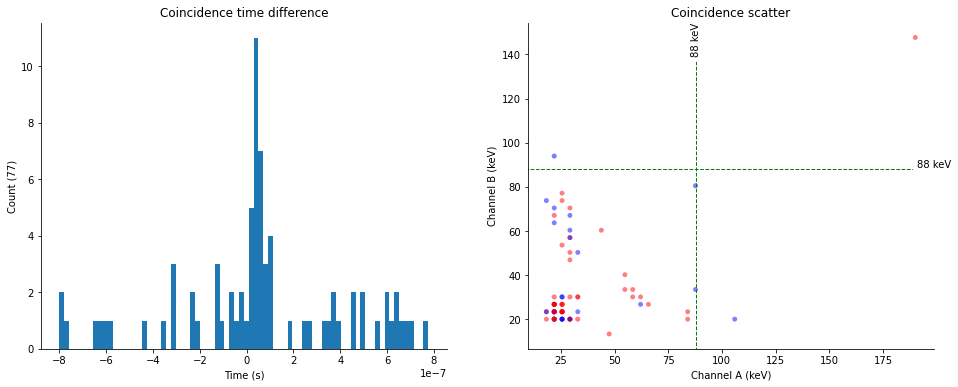

In [17]:
st.plot_time_histogram_and_scatter(time_difference=100)

## Coincidence spectra

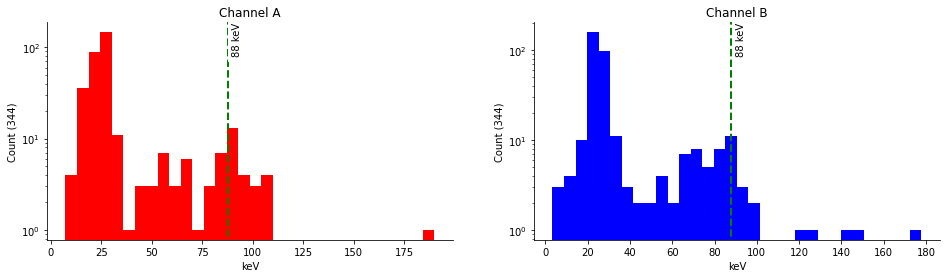

In [18]:
st.plot_spectra(coincidences=True, log=True, bins=(32, 32));

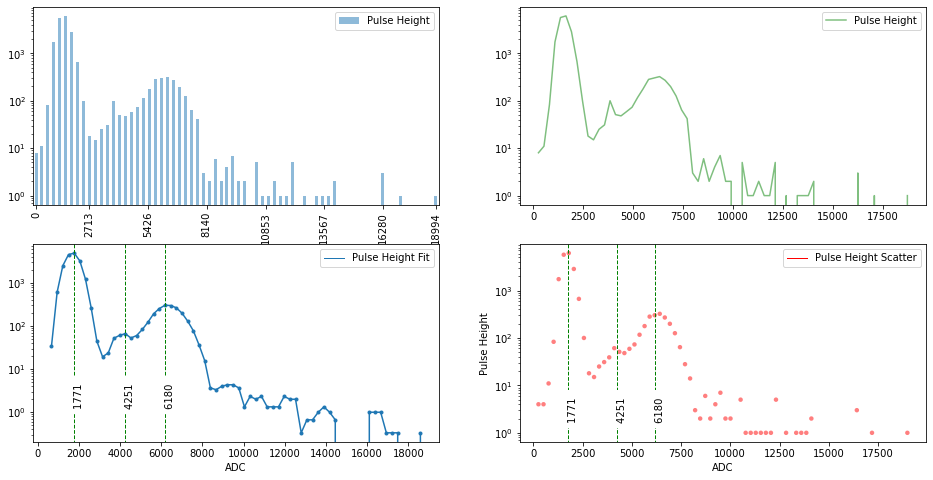

In [19]:
st = Stats()
st.read_stats_dataframe(directory1);
st.plot_channel_pulse_height_spectrum("A", bins = 69, rolling = 3, width = 1, distance = 1, threshold = 0.0001);

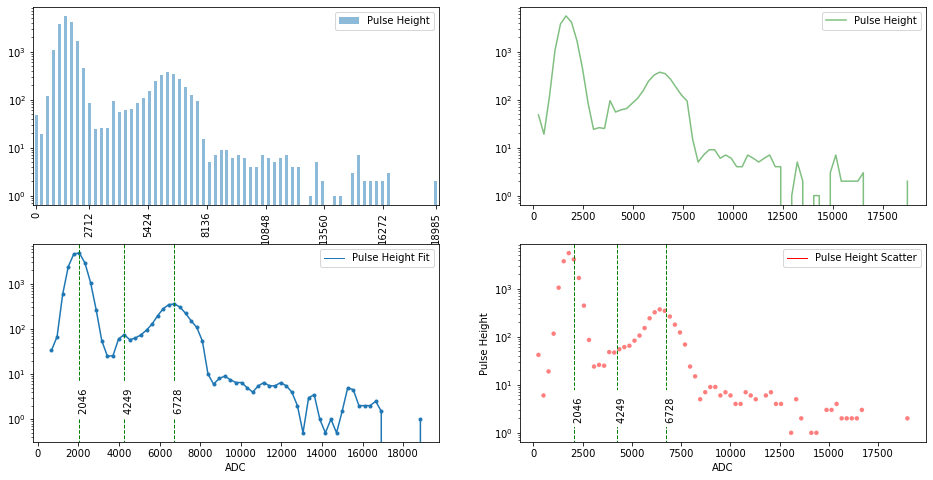

In [20]:
st.plot_channel_pulse_height_spectrum("B", bins=69, rolling=2, width = 1, distance = 1, threshold = 0.0001);

#### Data

In [21]:
st.print_stats_link()

<br/><center><h3>Download csv file: <a target='_blank' href='https://github.com/markomanninen/tandempiercerexperiment/raw/main/experiments\default_2022_2_17_16_48\statistics.csv'>statistics.csv</a></h3></center>

Output head and tail of the statistics data:

In [22]:
def fstats(d):
    d["Elapsed"] = d["Elapsed"].astype(int)
    d["RateA"] = d["RateA"].astype(int)
    d["RateB"] = d["RateB"].astype(int)
    return d

fstats(st.stats[:])

,RateCount,Time,Elapsed,A,B,TotA,TotB,RateA,RateB,Cnc,TotCnc,ElapsedCncRate,SampleCncRate,TimeDifference,APulseHeight,BPulseHeight,SampleSize,Chn
0,1,2022-02-17 14:48:30.976897478,0,1,0,1,0,250000,0,0,0,0.000,0.000,nan,1796,0,0.000,0
1,2,2022-02-17 14:48:30.990859509,0,0,1,1,1,125000,125000,0,0,0.000,0.000,nan,0,1539,0.000,1
2,3,2022-02-17 14:48:31.005820751,0,1,0,2,1,166666,83333,0,0,0.000,0.000,nan,1540,0,0.000,0
3,4,2022-02-17 14:48:31.021778584,0,0,1,2,2,125000,125000,0,0,0.000,0.000,nan,0,2052,0.000,1
4,5,2022-02-17 14:48:31.035740376,0,1,0,3,2,150000,100000,0,0,0.000,0.000,nan,1796,0,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38787,38788,2022-02-17 14:58:30.896285534,599,0,1,19673,19536,126798,125915,0,348,0.580,2242.962,nan,0,1539,0.155,1
38788,38789,2022-02-17 14:58:30.912241936,599,1,0,19674,19536,126801,125911,0,348,0.580,2242.904,nan,1283,0,0.155,0
38789,38790,2022-02-17 14:58:30.926205158,599,0,1,19674,19537,126798,125915,0,348,0.580,2242.846,nan,0,7696,0.155,1
38790,38791,2022-02-17 14:58:30.941169977,599,1,0,19675,19537,126801,125911,0,348,0.580,2242.788,nan,6673,0,0.155,0


<hr />

In [23]:
get_report_header(directory2)

<h2>Cd-109 10μci whole spectrum</h2><h3>General settings</h3>                <table>                <tr><th>Pulse source</th><td>Cd-109 10μci</td></tr>                <tr><th>Pulse detection</th><td>SCA `(pos[:-1] & ~pos[1:]).nonzero()`</td></tr>                <tr><th>Sample size</th><td>8e-06s</td></tr>                <tr><th>Resolution</th><td>8e-09s</td></tr>                <tr><th>PicoScope trigger</th><td>simple, alternate: True </td></tr>                <tr><th>Detector geometry</th><td>true</td></tr>                <tr><th>Front detector</th><td>na</td></tr>                <tr><th>PMT High Voltage</th><td>-1000</td></tr>                </table>
<h3>SCA instrument details</h3>
|             | Detector A   | Detector B   |
|:------------|:-------------|:-------------|
| Sca Model   | Ortec 490B   | Ortec 490B   |
| Coarse Gain | 4.0          | 4.0          |
| Fine Gain   | 3.75         | 10.0         |
| Mode        | diff         | diff         |
| Window      | 10.0         | 10.0         |
| Lower Level | 0.7          | 0.4          |
<h3>ADC limits for PicoScope channels</h3>
|                 | A (0)   | B (1)   | C (2)   | D (3)   |
|:----------------|:--------|:--------|:--------|:--------|
| Voltage range   | 10V     | 10V     | 20V     | 20V     |
| ADC low limits  | 4096    | 4096    | 842     | 576     |
| ADC high limits | 32768   | 32768   | 19661   | 19661   |
<h3>PicoScope channel map</h3>
|                        |   Detector A |   Detector B |
|:-----------------------|-------------:|-------------:|
| Sca Square Pulse Index |            0 |            1 |
| Raw Pulse Index        |            2 |            3 |
<h3>PicoScope trigger details</h3>            <table>            <tr><th>Channel (start)</th><td>0</td></tr>            <tr><th>Delay (samples)</th><td>0</td></tr>            <tr><th>Direction</th><td>RISING</td></tr>            <tr><th>Threshold (ADC)</th><td>16384</td></tr>            </table>


### Experiment statistics

Read statistics from the experiment and output basic data:

In [24]:
st2 = Stats()
st2.read_stats_dataframe(directory2);
st2.print_basic_data();



Start time:	2022-02-17 15:15:27
End time:	2022-02-17 15:25:27
Time elapsed:	0:10:00
Rows count:	38711
Total count A:	21329
Total count B:	20417
Elapsed rate A:	35.548/s
Elapsed rate B:	34.028/s
Sample rate A:	137489.1/s
Sample rate B:	131903.0/s


Total coincidences:		2470
Single coincidences:		2293
Coincidence elapsed rate:	4.4/s
Coincidence sample rate:	17036.45/s


### Detector clicks in time

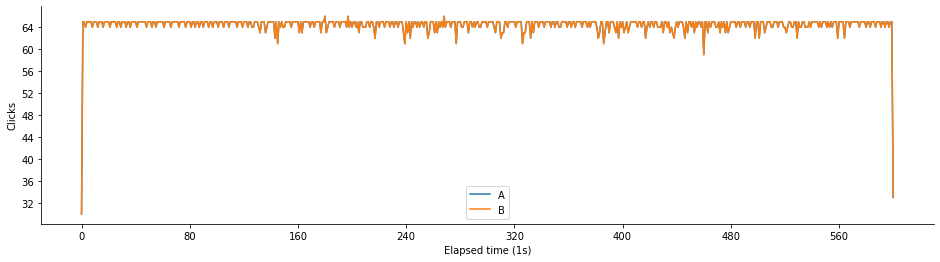

In [25]:
st2.plot_channel_counts(sec=1)

### Detector accumulated clicks and sample rates

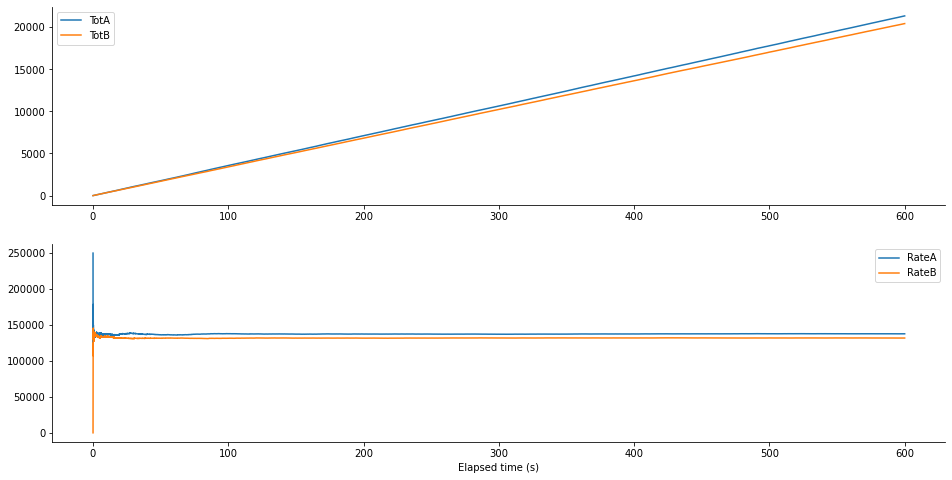

In [26]:
st2.plot_channel_totals_and_rates()

### Detectors coincidence counts and rates

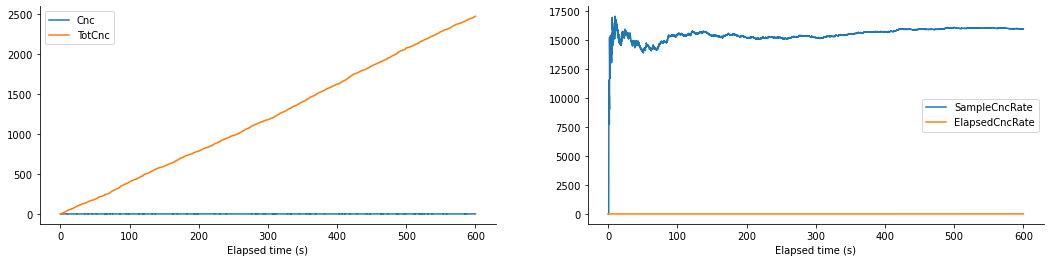

In [27]:
st2.plot_coincidences_and_sample_rate()

## Coincidence time histogram and scatter plot

Set calibrated values, ADC corresponding to kilo-electronvolts:

In [28]:
st2.adc_calibrate_a(adc_xvalues_a[peak_a[gamma_photo_peak_index]], gamma_photo_peak_cd109)
st2.adc_calibrate_b(adc_xvalues_b[peak_b[gamma_photo_peak_index]], gamma_photo_peak_cd109)

st2.add_calibration_line(xray_peak_cd109)
st2.add_calibration_line(escape_peak)

#### Channel A

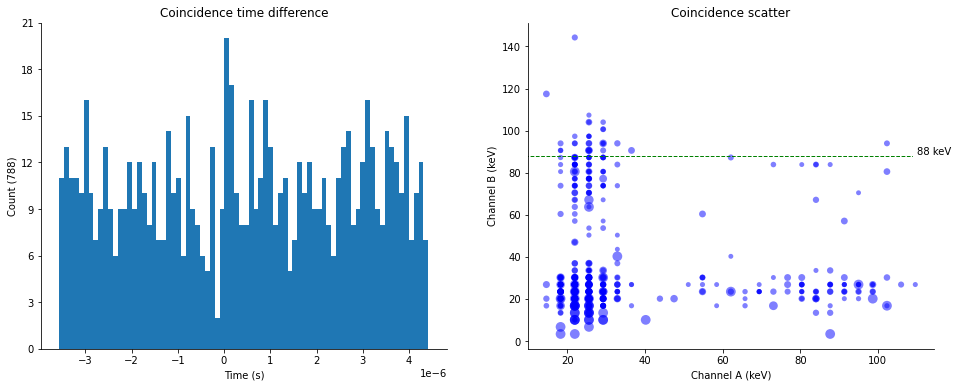

In [29]:
st2.plot_time_histogram_and_scatter(channel=0)

#### Channel B

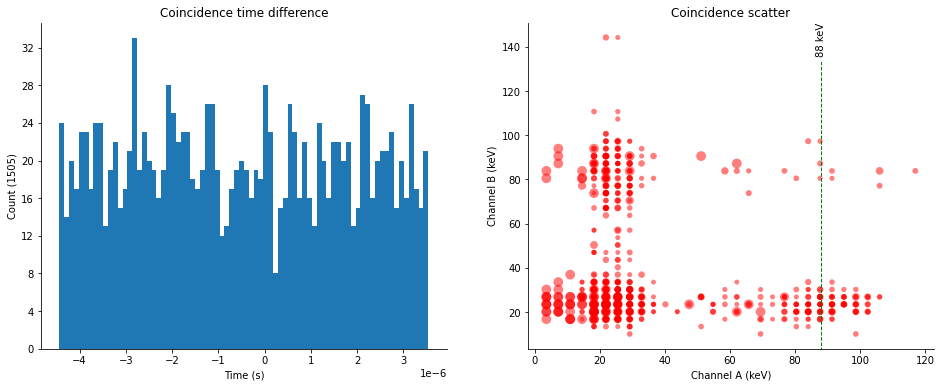

In [30]:
st2.plot_time_histogram_and_scatter(channel=1)

#### Both channels A & B

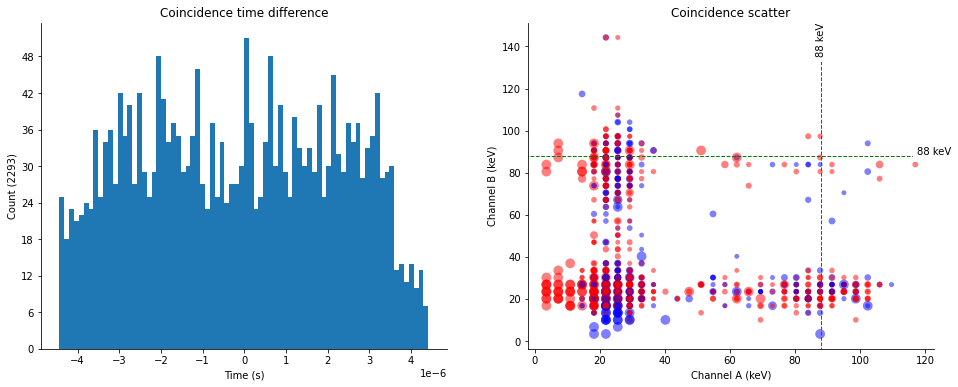

In [31]:
st2.plot_time_histogram_and_scatter()

### Only coincidences where time difference is from zero to 100

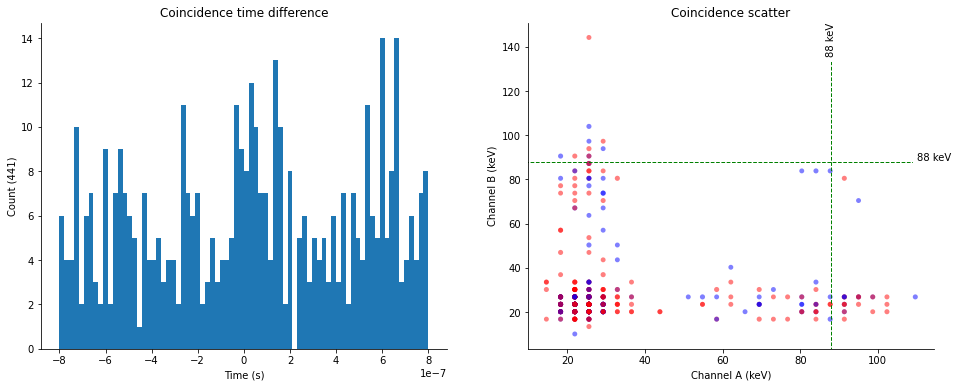

In [32]:
st2.plot_time_histogram_and_scatter(time_difference = 100)

## Coincidence spectra

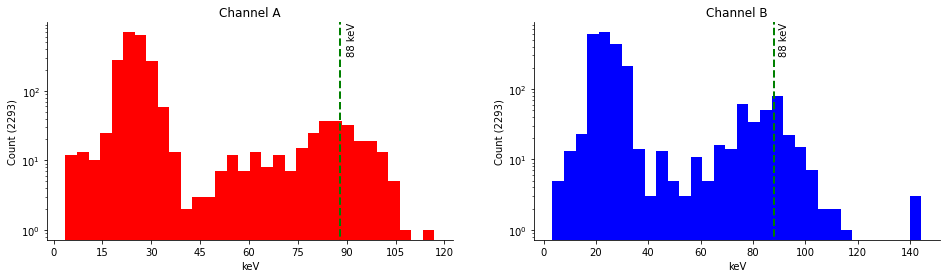

In [33]:
st2.plot_spectra(coincidences = True, log = True, bins = (32, 32));

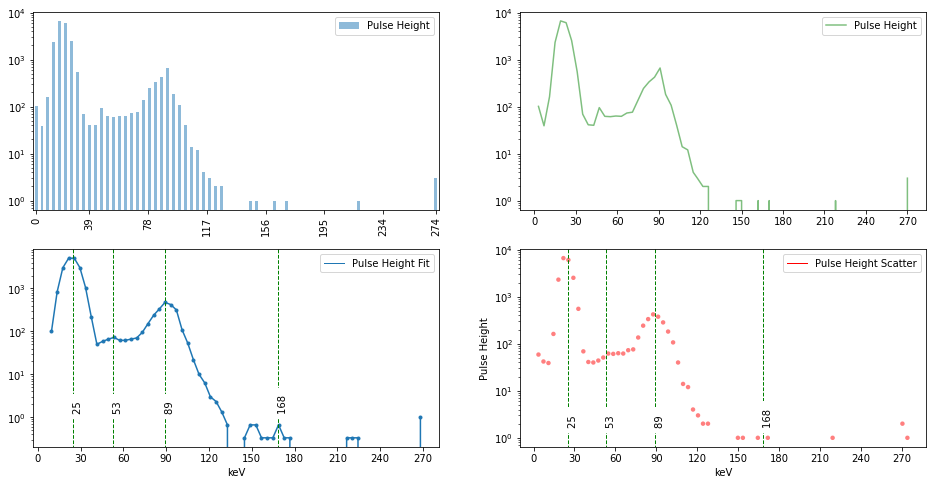

In [34]:
st2.plot_channel_pulse_height_spectrum("A", bins=69, rolling=3);

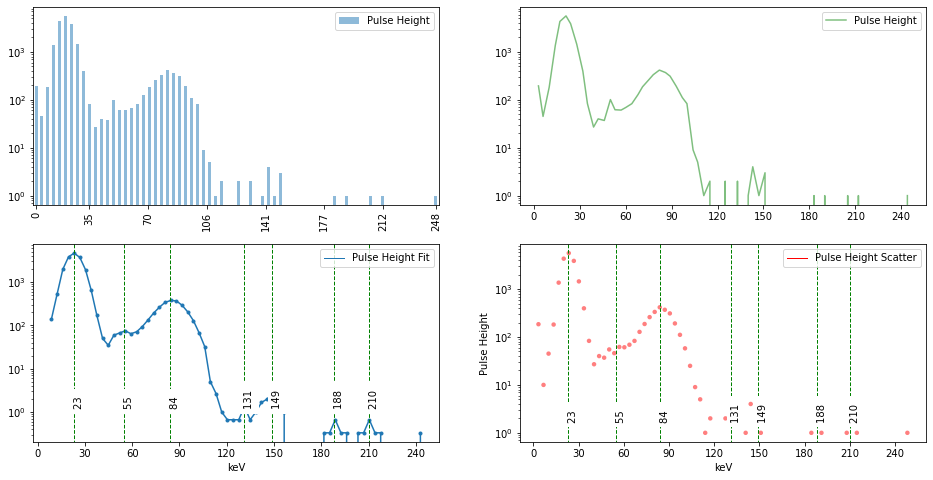

In [35]:
st2.plot_channel_pulse_height_spectrum("B", bins=69, rolling=3);

## Channel spectra with the fitted line

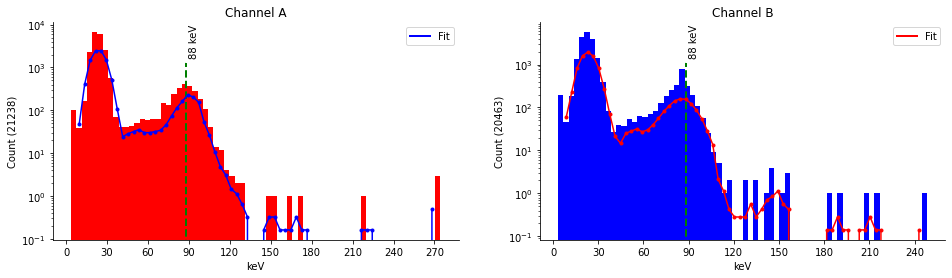

In [36]:
get_fit_spectra = lambda: st2.fit_spectra(coincidences=False, log=True, bins=(70, 70))
norm_a, norm_b, plot_a, plot_b, kev_xvalues_a, kev_xvalues_b = get_fit_spectra()

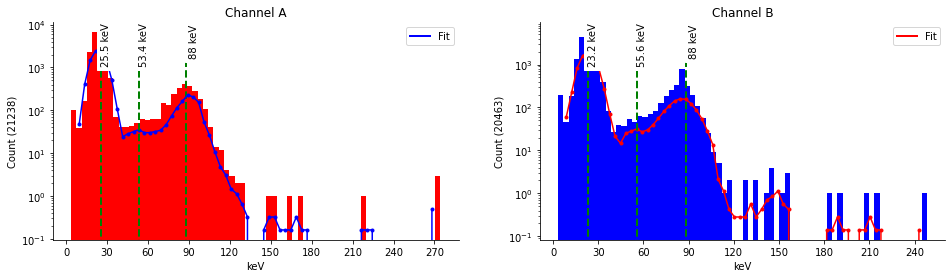

In [37]:
peak_a = plot_peak_lines(norm_a, width = 1, distance = 1, threshold = 0.0001)
peak_b = plot_peak_lines(norm_b, width = 1, distance = 1, threshold = 0.0001)

add_calibration_line(plot_a, round(kev_xvalues_a[peak_a[xray_peak_index]], 1), "keV")
add_calibration_line(plot_b, round(kev_xvalues_b[peak_b[xray_peak_index]], 1), "keV")

add_calibration_line(plot_a, round(kev_xvalues_a[peak_a[escape_peak_index]], 1), "keV")
add_calibration_line(plot_b, round(kev_xvalues_b[peak_b[escape_peak_index]], 1), "keV")

plot_a.figure

### ADC to keV conversion

Output peaklines ADC to keV conversion table:

In [38]:
pd.DataFrame({
    "":    ["X-ray peak", "Escape peak", "Gamma photo peak"],
    "Ideal keV": [xray_peak_cd109, escape_peak, gamma_photo_peak_cd109],
    "ADC (A)": 
        [int(st2.to_adc_a(kev_xvalues_a[peak_a[xray_peak_index]])),
         int(st2.to_adc_a(kev_xvalues_a[peak_a[escape_peak_index]])), 
         int(st2.to_adc_a(kev_xvalues_a[peak_a[gamma_photo_peak_index]]))],
    "ADC (B)": 
        [int(st2.to_adc_b(kev_xvalues_b[peak_b[xray_peak_index]])),
         int(st2.to_adc_b(kev_xvalues_b[peak_b[escape_peak_index]])), 
         int(st2.to_adc_b(kev_xvalues_b[peak_b[gamma_photo_peak_index]]))]
}).set_index("")

,Ideal keV,ADC (A),ADC (B)
,,,
X-ray peak,22.100,1792,1770
Escape peak,57.000,3747,4249
Gamma photo peak,88.000,6261,6453


### Data

In [39]:
st2.print_stats_link()

<br/><center><h3>Download csv file: <a target='_blank' href='https://github.com/markomanninen/tandempiercerexperiment/raw/main/experiments\default_2022_2_17_17_15\statistics.csv'>statistics.csv</a></h3></center>

Output head and tail of the statistics data:

In [40]:
fstats(st2.stats[:])

,RateCount,Time,Elapsed,A,B,TotA,TotB,RateA,RateB,Cnc,TotCnc,ElapsedCncRate,SampleCncRate,TimeDifference,APulseHeight,BPulseHeight,SampleSize,Chn
0,1,2022-02-17 15:15:27.066137552,0,1,0,1,0,250000,0,0,0,0.000,0.000,nan,2566,0,0.000,0
1,2,2022-02-17 15:15:27.094035149,0,0,1,1,1,125000,125000,0,0,0.000,0.000,nan,0,6670,0.000,1
2,3,2022-02-17 15:15:27.108004570,0,2,0,3,1,250000,83333,0,0,0.000,0.000,nan,2053,0,0.000,0
3,4,2022-02-17 15:15:27.123955965,0,0,1,3,2,187500,125000,0,0,0.000,0.000,nan,0,1026,0.000,1
4,5,2022-02-17 15:15:27.138915777,0,1,0,4,2,200000,100000,0,0,0.000,0.000,nan,1540,0,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38706,38707,2022-02-17 15:25:26.980555058,599,1,0,21327,20415,137746,131855,0,2470,4.117,15953.187,nan,1540,0,0.155,0
38707,38708,2022-02-17 15:25:26.994518042,599,0,1,21327,20416,137742,131859,0,2470,4.117,15952.775,nan,0,1795,0.155,1
38708,38709,2022-02-17 15:25:27.010475636,599,1,0,21328,20416,137745,131855,0,2470,4.117,15952.362,nan,4876,0,0.155,0
38709,38710,2022-02-17 15:25:27.026432514,599,0,1,21328,20417,137742,131858,0,2470,4.117,15951.950,nan,0,1539,0.155,1


In [41]:
get_report_header(directory3)

<h2>Co-57 10μci whole spectrum</h2><h3>General settings</h3>                <table>                <tr><th>Pulse source</th><td>Co-57 10μci</td></tr>                <tr><th>Pulse detection</th><td>SCA `(pos[:-1] & ~pos[1:]).nonzero()`</td></tr>                <tr><th>Sample size</th><td>8e-06s</td></tr>                <tr><th>Resolution</th><td>8e-09s</td></tr>                <tr><th>PicoScope trigger</th><td>simple, alternate: True </td></tr>                <tr><th>Detector geometry</th><td>true</td></tr>                <tr><th>Front detector</th><td>na</td></tr>                <tr><th>PMT High Voltage</th><td>-1000</td></tr>                </table>
<h3>SCA instrument details</h3>
|             | Detector A   | Detector B   |
|:------------|:-------------|:-------------|
| Sca Model   | Ortec 490B   | Ortec 490B   |
| Coarse Gain | 4.0          | 4.0          |
| Fine Gain   | 3.75         | 10.0         |
| Mode        | diff         | diff         |
| Window      | 10.0         | 10.0         |
| Lower Level | 0.7          | 0.4          |
<h3>ADC limits for PicoScope channels</h3>
|                 | A (0)   | B (1)   | C (2)   | D (3)   |
|:----------------|:--------|:--------|:--------|:--------|
| Voltage range   | 10V     | 10V     | 20V     | 20V     |
| ADC low limits  | 4096    | 4096    | 842     | 576     |
| ADC high limits | 32768   | 32768   | 19661   | 19661   |
<h3>PicoScope channel map</h3>
|                        |   Detector A |   Detector B |
|:-----------------------|-------------:|-------------:|
| Sca Square Pulse Index |            0 |            1 |
| Raw Pulse Index        |            2 |            3 |
<h3>PicoScope trigger details</h3>            <table>            <tr><th>Channel (start)</th><td>0</td></tr>            <tr><th>Delay (samples)</th><td>0</td></tr>            <tr><th>Direction</th><td>RISING</td></tr>            <tr><th>Threshold (ADC)</th><td>16384</td></tr>            </table>


In [42]:
st3 = Stats()
st3.read_stats_dataframe(directory3);
st3.print_basic_data();



Start time:	2022-02-17 15:27:17
End time:	2022-02-17 15:37:17
Time elapsed:	0:10:00
Rows count:	38799
Total count A:	24682
Total count B:	22930
Elapsed rate A:	41.137/s
Elapsed rate B:	38.217/s
Sample rate A:	159306.8/s
Sample rate B:	148538.3/s


Total coincidences:		6920
Single coincidences:		5440
Coincidence elapsed rate:	25.278/s
Coincidence sample rate:	125000.0/s


### Detector clicks in time

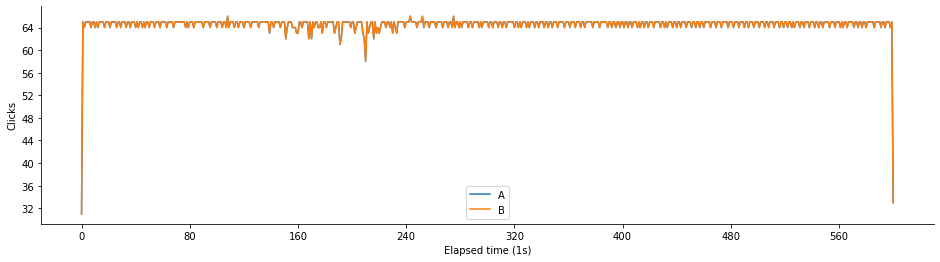

In [43]:
st3.plot_channel_counts(sec=1)

### Detector accumulated clicks and sample rates

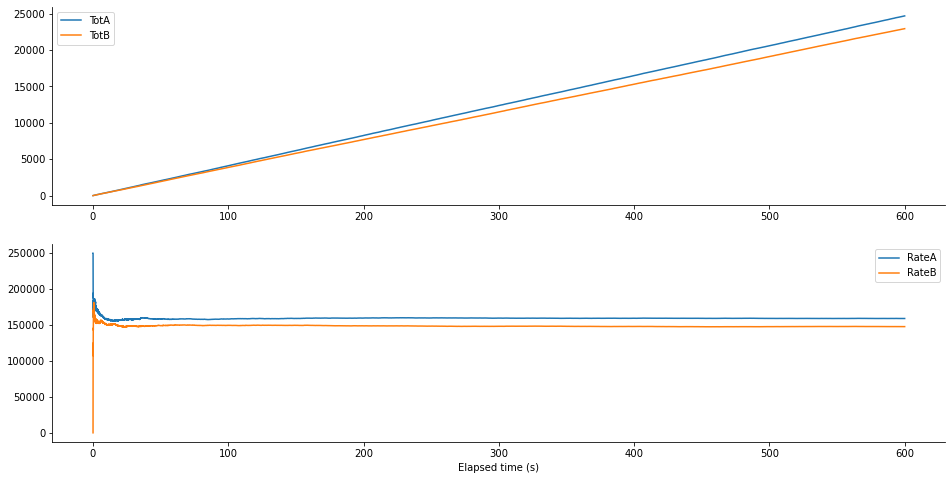

In [44]:
st3.plot_channel_totals_and_rates()

### Detectors coincidence counts and rates

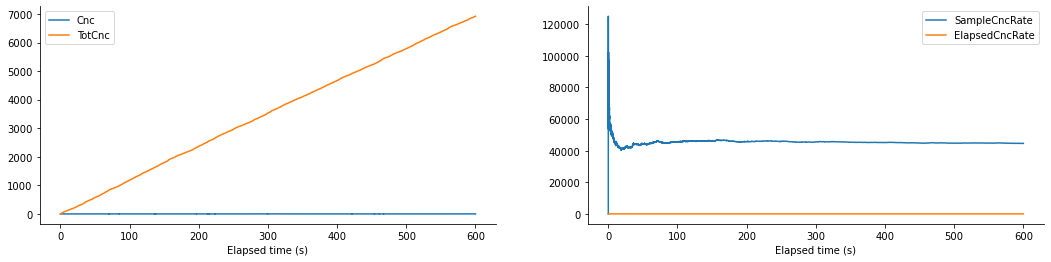

In [45]:
st3.plot_coincidences_and_sample_rate()

## Coincidence time histogram and scatter plot

Set calibrated values, ADC corresponding to kilo-electronvolts:

In [46]:
st3.adc_calibrate_a(adc_xvalues_a[peak_a[gamma_photo_peak_index]], gamma_photo_peak_cd109)
st3.adc_calibrate_b(adc_xvalues_b[peak_b[gamma_photo_peak_index]], gamma_photo_peak_cd109)

gamma_photo_peak_co57 = 122
st3.add_calibration_line_a(gamma_photo_peak_co57)
st3.add_calibration_line_b(gamma_photo_peak_co57)

#### Channel A

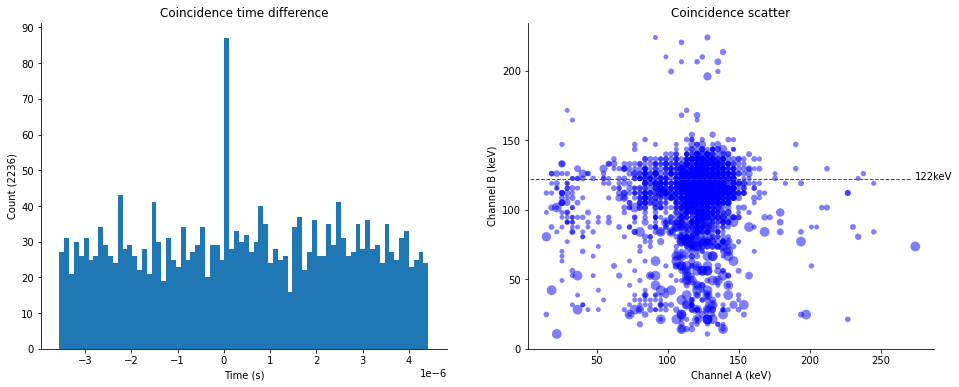

In [47]:
st3.plot_time_histogram_and_scatter(channel=0, hide_calibration=True)

#### Channel B

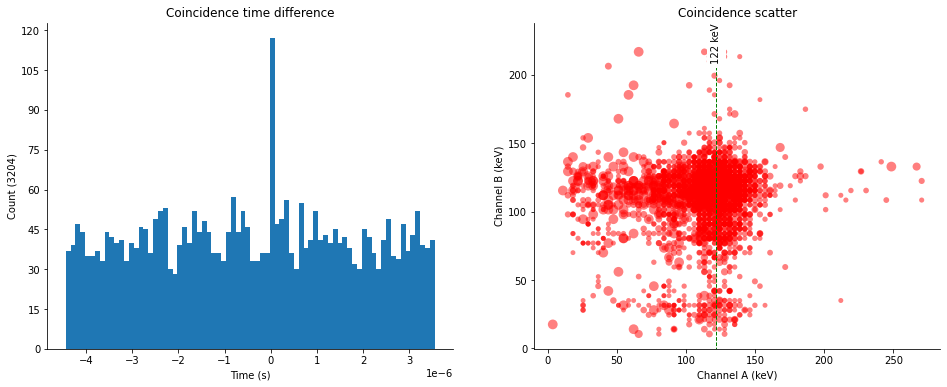

In [48]:
st3.plot_time_histogram_and_scatter(channel=1, hide_calibration=True)

#### Both channels A & B

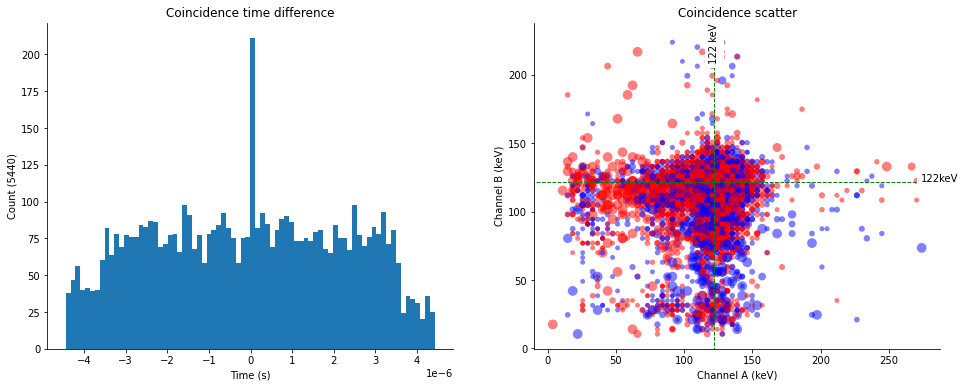

In [49]:
st3.plot_time_histogram_and_scatter(hide_calibration=True)

### Only coincidences where time difference is zero

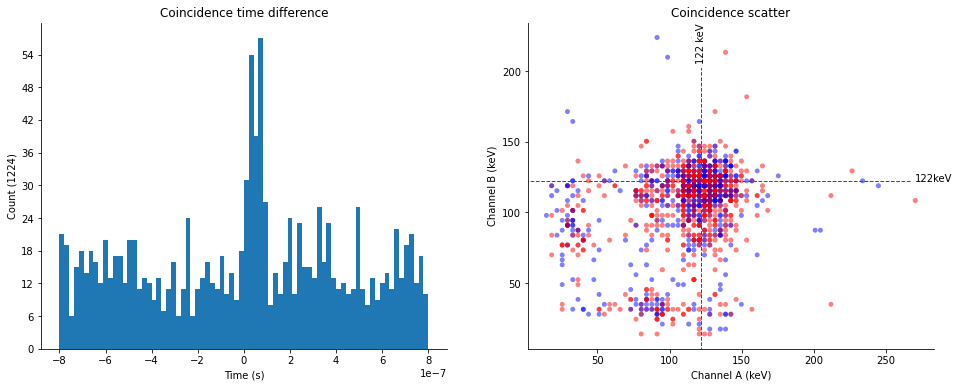

In [50]:
st3.plot_time_histogram_and_scatter(time_difference=100, hide_calibration=True)

## Coincidence spectra

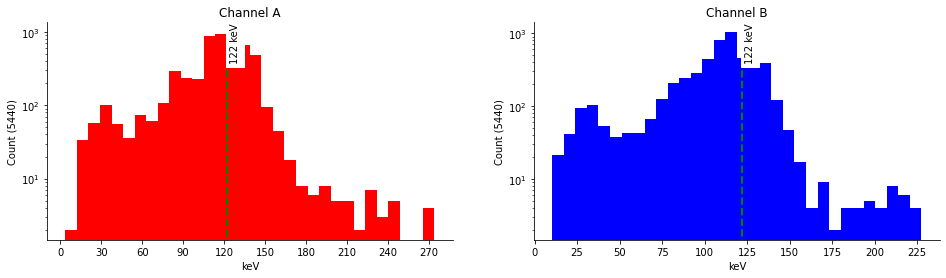

In [51]:
st3.plot_spectra(coincidences=True, log=True, bins=(32, 32), hide_calibration=True);

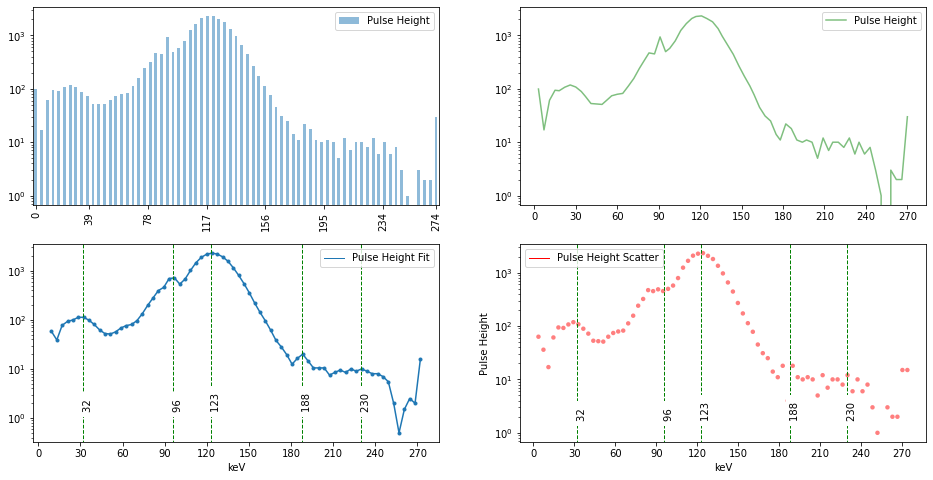

In [52]:
st3.plot_channel_pulse_height_spectrum("A", bins=72, rolling=2, width=1.0, distance=5, threshold=0.000001);

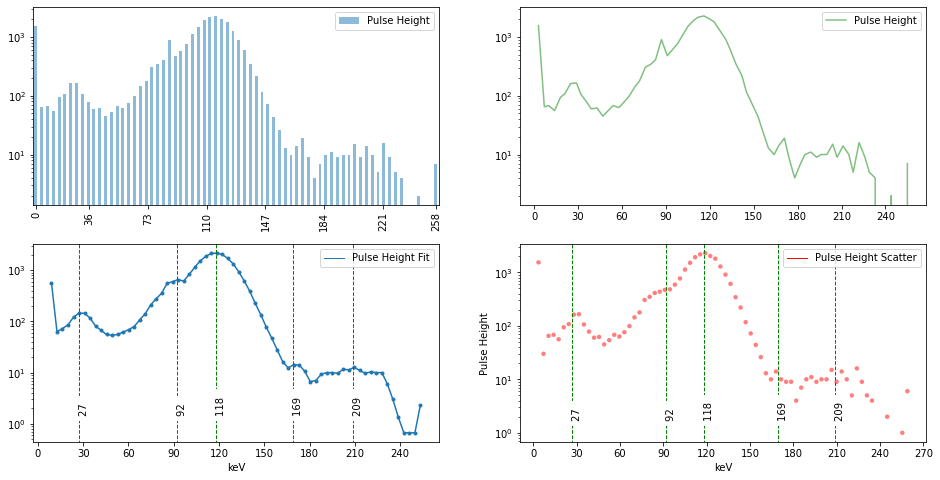

In [53]:
st3.plot_channel_pulse_height_spectrum("B", bins=71, rolling=3);

## Channel spectra with the fitted line

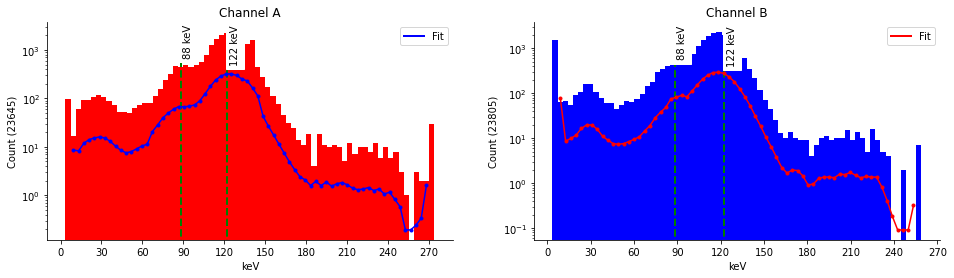

In [54]:
get_fit_spectra = lambda x: st3.fit_spectra(coincidences = False, hide_calibration = x, log = True, bins = (72, 72), rolling = (3,3))
norm_a, norm_b, plot_a, plot_b, kev_xvalues_a, kev_xvalues_b = get_fit_spectra(False);

### Redraw peaklines with peak finder

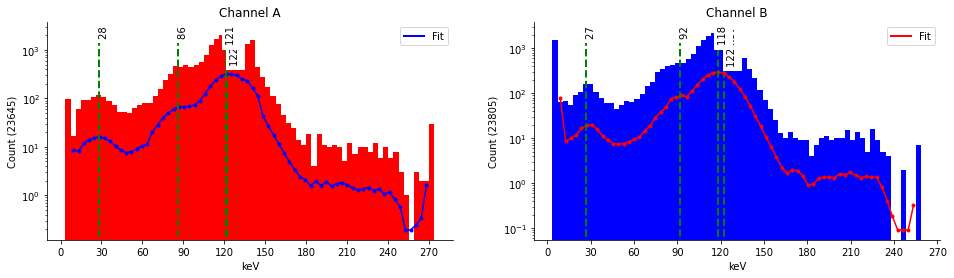

In [55]:
norm_a, norm_b, plot_a, plot_b, kev_xvalues_a, kev_xvalues_b = get_fit_spectra(True);

peak_a = plot_peak_lines(norm_a, width = .1, distance = 1, threshold = 0.0000001)
peak_b = plot_peak_lines(norm_b, width = .5, distance = 1, threshold = 0.00001)

for a, b in zip(peak_a[:3], peak_b[:3]):
    add_calibration_line(plot_a, int(kev_xvalues_a[a]))
    add_calibration_line(plot_b, int(kev_xvalues_b[b]))

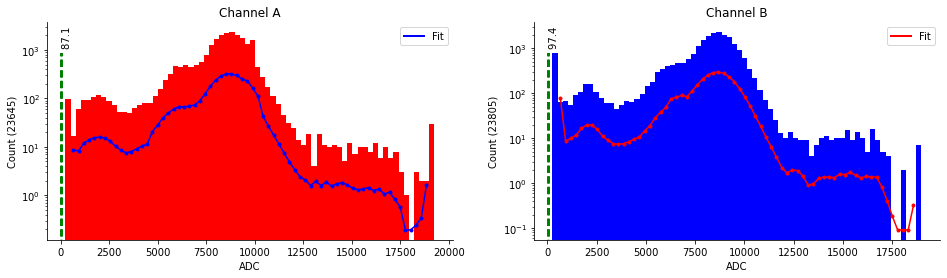

In [56]:
st3 = Stats()
st3.read_stats_dataframe(directory3);

norm_a, norm_b, plot_a, plot_b, adc_xvalues_a, adc_xvalues_b = get_fit_spectra(True);

st3.adc_calibrate_a(adc_xvalues_a[peak_a[gamma_photo_peak_index]], gamma_photo_peak_co57)
st3.adc_calibrate_b(adc_xvalues_b[peak_b[gamma_photo_peak_index]], gamma_photo_peak_co57)

peak_a = plot_peak_lines(norm_a, width = .1, distance = 1, threshold = 0.0000001)
peak_b = plot_peak_lines(norm_b, width = .5, distance = 1, threshold = 0.00001)

for a, b in zip(peak_a[:2], peak_b[:2]):
    add_calibration_line(plot_a, round(st3.to_kev_a(adc_xvalues_a[a]), 1))
    add_calibration_line(plot_b, round(st3.to_kev_a(adc_xvalues_b[b]), 1))

### ADC to keV conversion

Output peaklines ADC to keV conversion table:

In [57]:
compton_edge = 28
compton_edge_index = 0
xray_escape_peak = 89
xray_escape_peak_index = 1

pd.DataFrame({
    "":    ["Compton edge", "X-ray escape peak", "Gamma photo peak"],
    "Ideal keV": [compton_edge, xray_escape_peak, gamma_photo_peak_co57],
    "Calibrated keV (A)": 
        [int(st3.to_kev_a(adc_xvalues_a[peak_a[compton_edge_index]])),
         int(st3.to_kev_a(adc_xvalues_a[peak_a[xray_escape_peak_index]])), 
         int(st3.to_kev_a(adc_xvalues_a[peak_a[gamma_photo_peak_index]]))],
    "Calibrated keV (B)": 
        [int(st3.to_kev_b(adc_xvalues_b[peak_b[compton_edge_index]])),
         int(st3.to_kev_b(adc_xvalues_b[peak_b[xray_escape_peak_index]])), 
         int(st3.to_kev_b(adc_xvalues_b[peak_b[gamma_photo_peak_index]]))],
    "ADC (A)": 
        [adc_xvalues_a[peak_a[compton_edge_index]],
         adc_xvalues_a[peak_a[xray_escape_peak_index]], 
         adc_xvalues_a[peak_a[gamma_photo_peak_index]]],
    "ADC (B)": 
        [adc_xvalues_b[peak_b[compton_edge_index]],
         adc_xvalues_b[peak_b[xray_escape_peak_index]], 
         adc_xvalues_b[peak_b[gamma_photo_peak_index]]]
}).set_index("")

,Ideal keV,Calibrated keV (A),Calibrated keV (B),ADC (A),ADC (B)
,,,,,
Compton edge,28,28,28,2019.729,1995.121
X-ray escape peak,89,87,95,6089.871,6811.150
Gamma photo peak,122,122,122,8531.957,8684.050


### Data

In [58]:
st3.print_stats_link()

<br/><center><h3>Download csv file: <a target='_blank' href='https://github.com/markomanninen/tandempiercerexperiment/raw/main/experiments\default_2022_2_17_17_27\statistics.csv'>statistics.csv</a></h3></center>

Output head and tail of the statistics data:

In [59]:
fstats(st3.stats[:])

,RateCount,Time,Elapsed,A,B,TotA,TotB,RateA,RateB,Cnc,TotCnc,ElapsedCncRate,SampleCncRate,TimeDifference,APulseHeight,BPulseHeight,SampleSize,Chn
0,1,2022-02-17 15:27:17.233427525,0,1,0,1,0,250000,0,0,0,0.000,0.000,nan,2310,0,0.000,0
1,2,2022-02-17 15:27:17.246360064,0,1,1,2,1,250000,125000,1,1,21.797,125000.000,-322.000,5646,9749,0.000,1
2,3,2022-02-17 15:27:17.260321379,0,1,0,3,1,250000,83333,0,1,16.712,83333.333,nan,7957,0,0.000,0
3,4,2022-02-17 15:27:17.276280403,0,0,1,3,2,187500,125000,0,1,13.193,62500.000,nan,0,8722,0.000,1
4,5,2022-02-17 15:27:17.292235851,0,1,0,4,2,200000,100000,0,1,10.899,50000.000,nan,7957,0,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38794,38795,2022-02-17 15:37:17.141813993,599,1,0,24679,22927,159034,147744,0,6918,11.531,44580.487,nan,8983,0,0.155,0
38795,38796,2022-02-17 15:37:17.156774044,599,1,1,24680,22928,159037,147747,1,6919,11.533,44585.782,-34.000,10010,7183,0.155,1
38796,38797,2022-02-17 15:37:17.171733618,599,1,0,24681,22928,159039,147743,0,6919,11.532,44584.633,nan,10523,0,0.155,0
38797,38798,2022-02-17 15:37:17.186725616,599,0,1,24681,22929,159035,147746,0,6919,11.532,44583.484,nan,0,8722,0.155,1


In [60]:
load_styles("../report.css")